In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

###  Importing data from the file 'Data_Filter_for_model_selection': getFinalData has been already processed in this file in the sense that it has been cleaned, transformed and modified for machine learning algorithms. In this notebook, Decision Tree has been applied to various targets 

In [2]:
from Data_Filter_for_model_selection import getFinalData

0.0
0.0
0.0
0.0
0.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5835784 entries, 1 to 6039728
Data columns (total 16 columns):
CMPLNT_FR_DT         object
CMPLNT_FR_TM         object
CMPLNT_TO_DT         object
CMPLNT_TO_TM         object
RPT_DT               object
OFNS_DESC            object
PD_DESC              object
CRM_ATPT_CPTD_CD     object
LAW_CAT_CD           object
BORO_NM              object
ADDR_PCT_CD          float64
LOC_OF_OCCUR_DESC    object
PREM_TYP_DESC        object
Latitude             float64
Longitude            float64
Lat_Lon              object
dtypes: float64(3), object(13)
memory usage: 756.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 4 columns):
Shape_Area    77 non-null float64
Shape_Leng    77 non-null float64
Precinct      77 non-null int64
the_geom      77 non-null object
dtypes: float64(2), int64(1), object(1)
memory usage: 2.5+ KB


In [3]:
crimes_pred_data = getFinalData()
crimes_pred_data.head()

,OFNS_DESC,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,Precinct,Time,Morning,Afternoon,Evening,Night
StartTime,,,,,,,,,,,,,
2014-03-30 20:40:00,DANGEROUS DRUGS,"CONTROLLED SUBSTANCE,INTENT TO",ATTEMPTED,FELONY,BRONX,INSIDE,RESIDENCE - APT. HOUSE,44,20.0,False,False,True,False
2015-12-31 19:45:00,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,COMPLETED,MISDEMEANOR,BRONX,INSIDE,STREET,44,19.0,False,False,True,False
2015-12-31 17:15:00,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,COMPLETED,MISDEMEANOR,BRONX,INSIDE,RESIDENCE - APT. HOUSE,44,17.0,False,True,False,False
2015-12-31 10:30:00,ASSAULT 3 & RELATED OFFENSES,"MENACING,UNCLASSIFIED",COMPLETED,MISDEMEANOR,BRONX,INSIDE,RESIDENCE - APT. HOUSE,44,10.0,True,False,False,False
2015-12-31 00:23:00,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,COMPLETED,MISDEMEANOR,BRONX,INSIDE,STREET,44,0.0,False,False,False,False


In [5]:
import warnings
warnings.filterwarnings("ignore")

# 1. Morning

In [8]:
data_morn = crimes_pred_data.drop(['PD_DESC','CRM_ATPT_CPTD_CD','Precinct','BORO_NM','Time','Afternoon','Evening','Night'],axis=1)

In [9]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
data_morn['OFNS_DESC'] = labelencoder_X.fit_transform(data_morn['OFNS_DESC'])
data_morn['PREM_TYP_DESC'] = labelencoder_X.fit_transform(data_morn['PREM_TYP_DESC'])
data_morn['LAW_CAT_CD'] = labelencoder_X.fit_transform(data_morn['LAW_CAT_CD'])
data_morn['LOC_OF_OCCUR_DESC'] = labelencoder_X.fit_transform(data_morn['LOC_OF_OCCUR_DESC'])
data_morn['Morning'] = labelencoder_X.fit_transform(data_morn['Morning'])

In [10]:
data_morn.head()

,OFNS_DESC,LAW_CAT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,Morning
StartTime,,,,,
2014-03-30 20:40:00,1,0,1,0,0
2015-12-31 19:45:00,0,1,1,2,0
2015-12-31 17:15:00,0,1,1,0,0
2015-12-31 10:30:00,0,1,1,0,1
2015-12-31 00:23:00,0,1,1,2,0


In [11]:
X_morn = data_morn.iloc[:, 0:4].values
Y_morn = data_morn.iloc[:, 4].values

In [12]:
X_morn.shape

(43259, 4)

In [13]:
Y_morn.shape

(43259,)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_morn, Y_morn, test_size = 0.25, random_state = 0)

In [15]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\Riidhima\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [16]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [17]:
explained_variance

array([0.34866883, 0.25363372])

In [18]:
X_train

array([[-0.43244121,  0.1979671 ],
       [ 1.88621246, -0.18112658],
       [-0.97868672, -1.36167396],
       ...,
       [ 1.88621246, -0.18112658],
       [ 1.33996695, -1.74076764],
       [ 1.12652553, -0.24190184]])

In [19]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

import os

from sklearn.metrics import classification_report
import sklearn.metrics

In [20]:
#Decision Tree for 'Morning'

classifier= DecisionTreeClassifier(max_leaf_nodes=10,random_state=0)
classifier_morn= classifier.fit(X_train,Y_train)
print(type(classifier))

predictions=classifier_morn.predict(X_test)
predictions_train=classifier_morn.predict(X_train)

confusion_matrix= sklearn.metrics.confusion_matrix(Y_test,predictions)
print('The confusion matrix is =')
print(confusion_matrix)

test_accuracy_score= sklearn.metrics.accuracy_score(Y_test,predictions)
print('The testing accuracy =')
print(test_accuracy_score)

train_accuracy_score= sklearn.metrics.accuracy_score(Y_train,predictions_train)
print('The training accuracy =')
print(train_accuracy_score)


<class 'sklearn.tree.tree.DecisionTreeClassifier'>
The confusion matrix is =
[[9497    0]
 [1318    0]]
The testing accuracy =
0.8781322237632917
The training accuracy =
0.8769263962520034


In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
cross_val_score(classifier_morn, X_morn, Y_morn)
print(cross_val_score)
predicted_cross = cross_val_predict(classifier_morn, X_morn, Y_morn, cv=10)
print(predicted_cross)

<function cross_val_score at 0x0000022039DBFF28>
[0 0 0 ... 0 0 0]


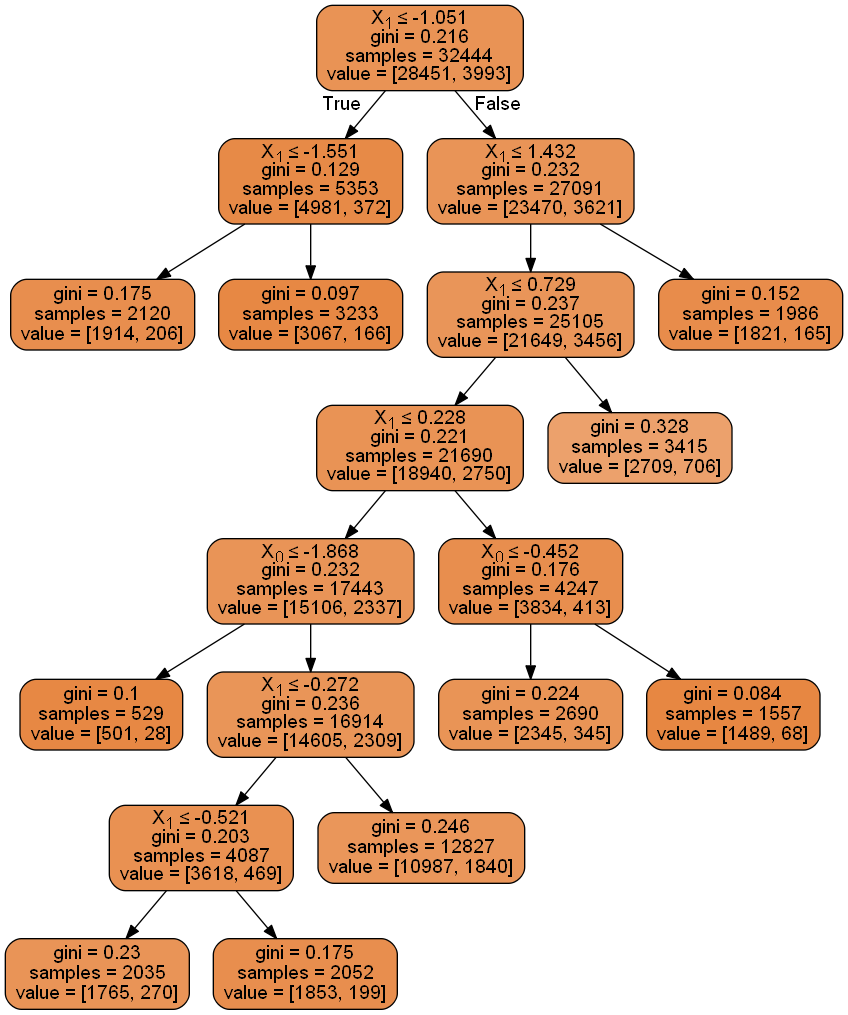

In [22]:
#Viewing the Tree output Image

from io import StringIO
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import os
import pydotplus
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

dot_data = StringIO()
export_graphviz(classifier_morn, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [23]:
from sklearn.ensemble import RandomForestClassifier 

forest_morn= RandomForestClassifier(n_estimators=100, random_state=0, criterion="gini")
forest_morn.fit(X_train,Y_train)

print('acc for training data: {:.3f}'.format(forest_morn.score(X_train,Y_train)))
print('acc for test data: {:.3f}'.format(forest_morn.score(X_test,Y_test)))

acc for training data: 0.877
acc for test data: 0.878


In [24]:
from sklearn import metrics

forpredict=forest_morn.predict(X_test)

confusion_matrix= sklearn.metrics.confusion_matrix(Y_test,forpredict)
print('The confusion matrix is =')
print(confusion_matrix)

print('Recall')
print(1- metrics.accuracy_score(Y_test,forpredict))
print('Precision')
print(metrics.precision_score(Y_test,forpredict))

TP=confusion_matrix[1,1]
TN=confusion_matrix[0,0]
FP=confusion_matrix[0,1]
FN=confusion_matrix[1,0]

sensitivity = TN/ float(TN + FP)
print('sensitivity')
print(sensitivity)

false_positive_rate= FP/ float (TN+FP)
print('Specificity')
print (false_positive_rate)


The confusion matrix is =
[[9497    0]
 [1318    0]]
Recall
0.1218677762367083
Precision
0.0
sensitivity
1.0
Specificity
0.0


C:\Users\Riidhima\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


# Afternoon

In [25]:
data_aft = crimes_pred_data.drop(['PD_DESC','CRM_ATPT_CPTD_CD','Precinct','BORO_NM','Time','Morning','Evening','Night'],axis=1)

labelencoder_X = LabelEncoder()
data_aft['OFNS_DESC'] = labelencoder_X.fit_transform(data_aft['OFNS_DESC'])
data_aft['PREM_TYP_DESC'] = labelencoder_X.fit_transform(data_aft['PREM_TYP_DESC'])
data_aft['LAW_CAT_CD'] = labelencoder_X.fit_transform(data_aft['LAW_CAT_CD'])
data_aft['LOC_OF_OCCUR_DESC'] = labelencoder_X.fit_transform(data_aft['LOC_OF_OCCUR_DESC'])
data_aft['Afternoon'] = labelencoder_X.fit_transform(data_aft['Afternoon'])

data_aft.head()

,OFNS_DESC,LAW_CAT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,Afternoon
StartTime,,,,,
2014-03-30 20:40:00,1,0,1,0,0
2015-12-31 19:45:00,0,1,1,2,0
2015-12-31 17:15:00,0,1,1,0,1
2015-12-31 10:30:00,0,1,1,0,0
2015-12-31 00:23:00,0,1,1,2,0


In [26]:
X_aft = data_aft.iloc[:, 0:4].values
Y_aft = data_aft.iloc[:, 4].values

In [27]:
#Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X_aft, Y_aft, test_size = 0.25, random_state = 0)

#Scaling the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#PCA
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

#Decision Tree for 'Afternoon'

classifier= DecisionTreeClassifier(max_leaf_nodes=10,random_state=0)
classifier_aft= classifier.fit(X_train,Y_train)
print(type(classifier))

predictions=classifier_aft.predict(X_test)
predictions_train=classifier_aft.predict(X_train)

confusion_matrix= sklearn.metrics.confusion_matrix(Y_test,predictions)
print('The confusion matrix is =')
print(confusion_matrix)

test_accuracy_score= sklearn.metrics.accuracy_score(Y_test,predictions)
print('The testing accuracy =')
print(test_accuracy_score)

train_accuracy_score= sklearn.metrics.accuracy_score(Y_train,predictions_train)
print('The training accuracy =')
print(train_accuracy_score)


[0.34866883 0.25363372]
<class 'sklearn.tree.tree.DecisionTreeClassifier'>
The confusion matrix is =
[[9036    0]
 [1779    0]]
The testing accuracy =
0.8355062413314841
The training accuracy =
0.8402786339538898


C:\Users\Riidhima\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


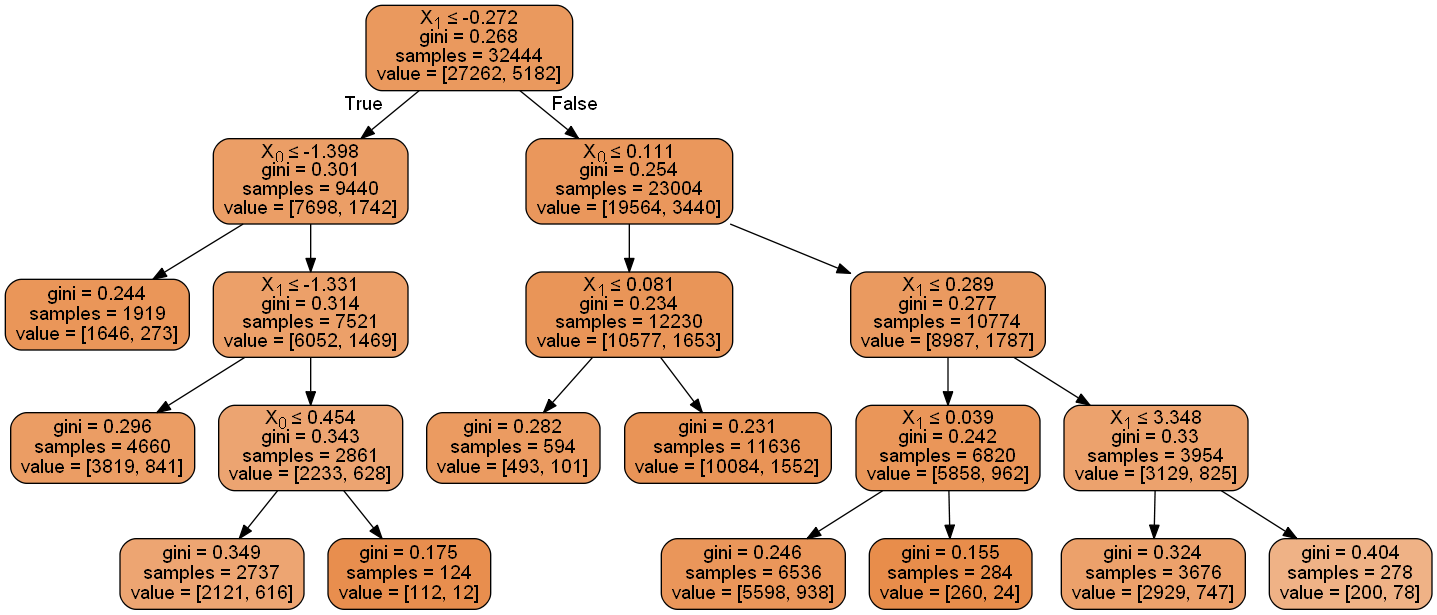

In [28]:
#Tree graph for 'Afternoon'

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

dot_data = StringIO()
export_graphviz(classifier_aft, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [29]:
#Random Forest for 'Afternoon'

forest_aft = RandomForestClassifier(n_estimators=100, random_state=0, criterion="gini")
forest_aft.fit(X_train,Y_train)

print('acc for training data: {:.3f}'.format(forest_aft.score(X_train,Y_train)))
print('acc for test data: {:.3f}'.format(forest_aft.score(X_test,Y_test)))

forpredict=forest_aft.predict(X_test)

confusion_matrix= sklearn.metrics.confusion_matrix(Y_test,forpredict)
print('The confusion matrix is =')
print(confusion_matrix)

print('Recall')
print(1- metrics.accuracy_score(Y_test,forpredict))
print('Precision')
print(metrics.precision_score(Y_test,forpredict))

TP=confusion_matrix[1,1]
TN=confusion_matrix[0,0]
FP=confusion_matrix[0,1]
FN=confusion_matrix[1,0]

sensitivity = TN/ float(TN + FP)
print('sensitivity')
print(sensitivity)

false_positive_rate= FP/ float (TN+FP)
print('Specificity')
print (false_positive_rate)


acc for training data: 0.840
acc for test data: 0.836
The confusion matrix is =
[[9036    0]
 [1779    0]]
Recall
0.1644937586685159
Precision
0.0
sensitivity
1.0
Specificity
0.0


C:\Users\Riidhima\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


# Evening

In [30]:
data_eve = crimes_pred_data.drop(['PD_DESC','CRM_ATPT_CPTD_CD','Precinct','BORO_NM','Time','Morning','Afternoon','Night'],axis=1)

labelencoder_X = LabelEncoder()
data_eve['OFNS_DESC'] = labelencoder_X.fit_transform(data_eve['OFNS_DESC'])
data_eve['PREM_TYP_DESC'] = labelencoder_X.fit_transform(data_eve['PREM_TYP_DESC'])
data_eve['LAW_CAT_CD'] = labelencoder_X.fit_transform(data_eve['LAW_CAT_CD'])
data_eve['LOC_OF_OCCUR_DESC'] = labelencoder_X.fit_transform(data_eve['LOC_OF_OCCUR_DESC'])
data_eve['Evening'] = labelencoder_X.fit_transform(data_eve['Evening'])

data_eve.head()

,OFNS_DESC,LAW_CAT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,Evening
StartTime,,,,,
2014-03-30 20:40:00,1,0,1,0,1
2015-12-31 19:45:00,0,1,1,2,1
2015-12-31 17:15:00,0,1,1,0,0
2015-12-31 10:30:00,0,1,1,0,0
2015-12-31 00:23:00,0,1,1,2,0


In [31]:
X_eve = data_eve.iloc[:, 0:4].values
Y_eve = data_eve.iloc[:, 4].values

In [32]:
#Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X_eve, Y_eve, test_size = 0.25, random_state = 0)

#Scaling the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#PCA
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

#Decision Tree for 'Evening'

classifier= DecisionTreeClassifier(max_leaf_nodes=10,random_state=0)
classifier_eve= classifier.fit(X_train,Y_train)
print(type(classifier))

predictions=classifier_eve.predict(X_test)
predictions_train=classifier_eve.predict(X_train)

confusion_matrix= sklearn.metrics.confusion_matrix(Y_test,predictions)
print('The confusion matrix is =')
print(confusion_matrix)

test_accuracy_score= sklearn.metrics.accuracy_score(Y_test,predictions)
print('The testing accuracy =')
print(test_accuracy_score)

train_accuracy_score= sklearn.metrics.accuracy_score(Y_train,predictions_train)
print('The training accuracy =')
print(train_accuracy_score)


[0.34866883 0.25363372]
<class 'sklearn.tree.tree.DecisionTreeClassifier'>
The confusion matrix is =
[[9461    0]
 [1354    0]]
The testing accuracy =
0.8748035136384651
The training accuracy =
0.8715016644063617


C:\Users\Riidhima\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


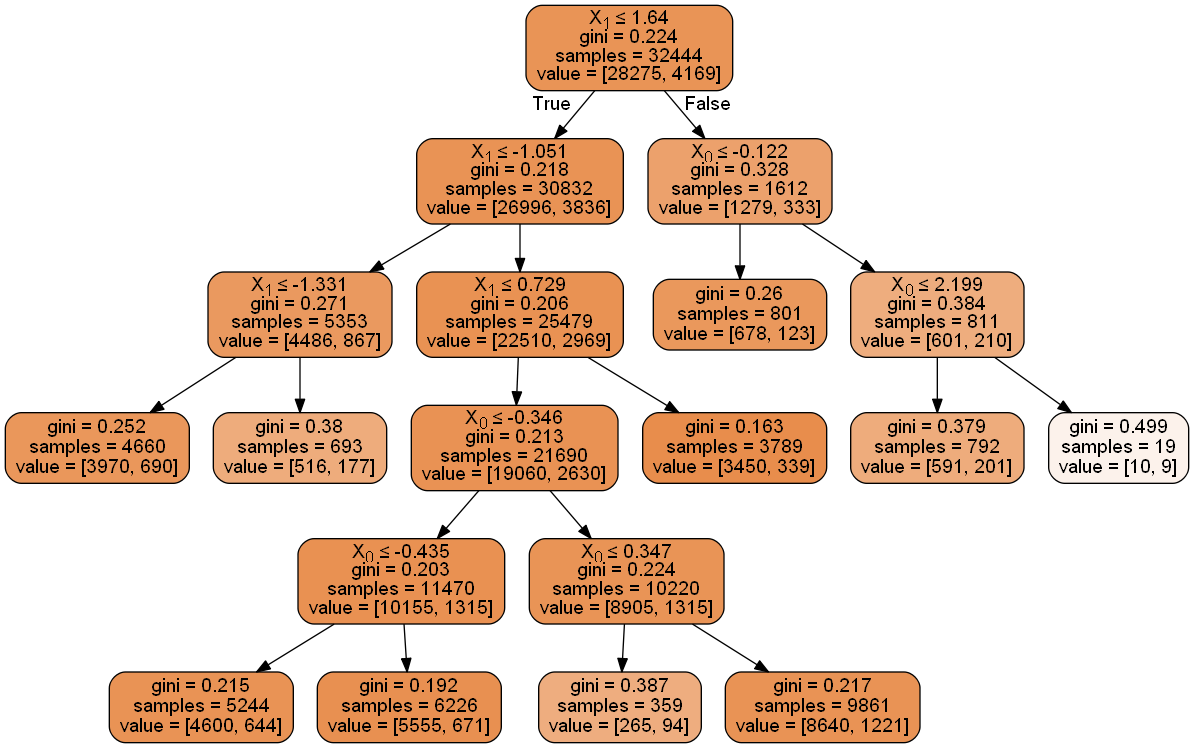

In [33]:
#Tree graph for 'Evening'

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

dot_data = StringIO()
export_graphviz(classifier_eve, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [34]:
#Random Forest for 'Evening'

forest_eve = RandomForestClassifier(n_estimators=100, random_state=0, criterion="gini")
forest_eve.fit(X_train,Y_train)

print('acc for training data: {:.3f}'.format(forest_eve.score(X_train,Y_train)))
print('acc for test data: {:.3f}'.format(forest_eve.score(X_test,Y_test)))

forpredict=forest_eve.predict(X_test)

confusion_matrix= sklearn.metrics.confusion_matrix(Y_test,forpredict)
print('The confusion matrix is =')
print(confusion_matrix)

print('Recall')
print(1- metrics.accuracy_score(Y_test,forpredict))
print('Precision')
print(metrics.precision_score(Y_test,forpredict))

TP=confusion_matrix[1,1]
TN=confusion_matrix[0,0]
FP=confusion_matrix[0,1]
FN=confusion_matrix[1,0]

sensitivity = TN/ float(TN + FP)
print('sensitivity')
print(sensitivity)

false_positive_rate= FP/ float (TN+FP)
print('Specificity')
print (false_positive_rate)

acc for training data: 0.872
acc for test data: 0.875
The confusion matrix is =
[[9459    2]
 [1354    0]]
Recall
0.12538141470180308
Precision
0.0
sensitivity
0.9997886058556178
Specificity
0.00021139414438220062


# Night

In [35]:
data_n = crimes_pred_data.drop(['PD_DESC','CRM_ATPT_CPTD_CD','Precinct','BORO_NM','Time','Morning','Afternoon','Evening'],axis=1)

labelencoder_X = LabelEncoder()
data_n['OFNS_DESC'] = labelencoder_X.fit_transform(data_n['OFNS_DESC'])
data_n['PREM_TYP_DESC'] = labelencoder_X.fit_transform(data_n['PREM_TYP_DESC'])
data_n['LAW_CAT_CD'] = labelencoder_X.fit_transform(data_n['LAW_CAT_CD'])
data_n['LOC_OF_OCCUR_DESC'] = labelencoder_X.fit_transform(data_n['LOC_OF_OCCUR_DESC'])
data_n['Night'] = labelencoder_X.fit_transform(data_n['Night'])

data_n.head()

,OFNS_DESC,LAW_CAT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,Night
StartTime,,,,,
2014-03-30 20:40:00,1,0,1,0,0
2015-12-31 19:45:00,0,1,1,2,0
2015-12-31 17:15:00,0,1,1,0,0
2015-12-31 10:30:00,0,1,1,0,0
2015-12-31 00:23:00,0,1,1,2,0


In [36]:
X_n = data_n.iloc[:, 0:4].values
Y_n = data_n.iloc[:, 4].values

In [37]:
#Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X_n, Y_n, test_size = 0.25, random_state = 0)

#Scaling the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#PCA
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

#Decision Tree for 'Night'

classifier= DecisionTreeClassifier(max_leaf_nodes=10,random_state=0)
classifier_n= classifier.fit(X_train,Y_train)
print(type(classifier))

predictions=classifier_n.predict(X_test)
predictions_train=classifier_n.predict(X_train)

confusion_matrix= sklearn.metrics.confusion_matrix(Y_test,predictions)
print('The confusion matrix is =')
print(confusion_matrix)

test_accuracy_score= sklearn.metrics.accuracy_score(Y_test,predictions)
print('The testing accuracy =')
print(test_accuracy_score)

train_accuracy_score= sklearn.metrics.accuracy_score(Y_train,predictions_train)
print('The training accuracy =')
print(train_accuracy_score)

[0.34866883 0.25363372]
<class 'sklearn.tree.tree.DecisionTreeClassifier'>
The confusion matrix is =
[[10815]]
The testing accuracy =
1.0
The training accuracy =
1.0


C:\Users\Riidhima\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


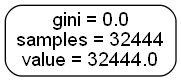

In [38]:
#Tree graph for 'Night'

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

dot_data = StringIO()
export_graphviz(classifier_n, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [39]:
#Random Forest for 'Night'

forest_n = RandomForestClassifier(n_estimators=100, random_state=0, criterion="gini")
forest_n.fit(X_train,Y_train)

print('acc for training data: {:.3f}'.format(forest_n.score(X_train,Y_train)))
print('acc for test data: {:.3f}'.format(forest_n.score(X_test,Y_test)))

forpredict=forest_n.predict(X_test)

confusion_matrix= sklearn.metrics.confusion_matrix(Y_test,forpredict)
print('The confusion matrix is =')
print(confusion_matrix)

print('Recall')
print(1- metrics.accuracy_score(Y_test,forpredict))
print('Precision')
print(metrics.precision_score(Y_test,forpredict))



acc for training data: 1.000
acc for test data: 1.000
The confusion matrix is =
[[10815]]
Recall
0.0
Precision
0.0


# Time

In [40]:
data_tm = crimes_pred_data.drop(['PD_DESC','CRM_ATPT_CPTD_CD','Precinct','BORO_NM','Morning','Afternoon','Evening','Night'],axis=1)

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
data_tm['OFNS_DESC'] = labelencoder_X.fit_transform(data_tm['OFNS_DESC'])
data_tm['PREM_TYP_DESC'] = labelencoder_X.fit_transform(data_tm['PREM_TYP_DESC'])
data_tm['LAW_CAT_CD'] = labelencoder_X.fit_transform(data_tm['LAW_CAT_CD'])
data_tm['LOC_OF_OCCUR_DESC'] = labelencoder_X.fit_transform(data_tm['LOC_OF_OCCUR_DESC'])
data_tm['Time'] = labelencoder_X.fit_transform(data_tm['Time'])

data_tm.head()

,OFNS_DESC,LAW_CAT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,Time
StartTime,,,,,
2014-03-30 20:40:00,1,0,1,0,20
2015-12-31 19:45:00,0,1,1,2,19
2015-12-31 17:15:00,0,1,1,0,17
2015-12-31 10:30:00,0,1,1,0,10
2015-12-31 00:23:00,0,1,1,2,0


In [41]:
X_tm = data_tm.iloc[:, 0:4].values
Y_tm = data_tm.iloc[:, 4].values

In [42]:
#Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X_tm, Y_tm, test_size = 0.25, random_state = 0)

#Scaling the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#PCA
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

#Decision Tree for 'Time'

classifier_tm= DecisionTreeClassifier(max_leaf_nodes=10,random_state=0)
classifier_tm= classifier.fit(X_train,Y_train)
print(type(classifier))

predictions=classifier_tm.predict(X_test)
predictions_train=classifier_tm.predict(X_train)

confusion_matrix= sklearn.metrics.confusion_matrix(Y_test,predictions)
print('The confusion matrix is =')
print(confusion_matrix)

test_accuracy_score= sklearn.metrics.accuracy_score(Y_test,predictions)
print('The testing accuracy =')
print(test_accuracy_score)

train_accuracy_score= sklearn.metrics.accuracy_score(Y_train,predictions_train)
print('The training accuracy =')
print(train_accuracy_score)

C:\Users\Riidhima\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[0.34866883 0.25363372]
<class 'sklearn.tree.tree.DecisionTreeClassifier'>
The confusion matrix is =
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
The testing accuracy =
0.051225150254276465
The training accuracy =
0.050425348292442364


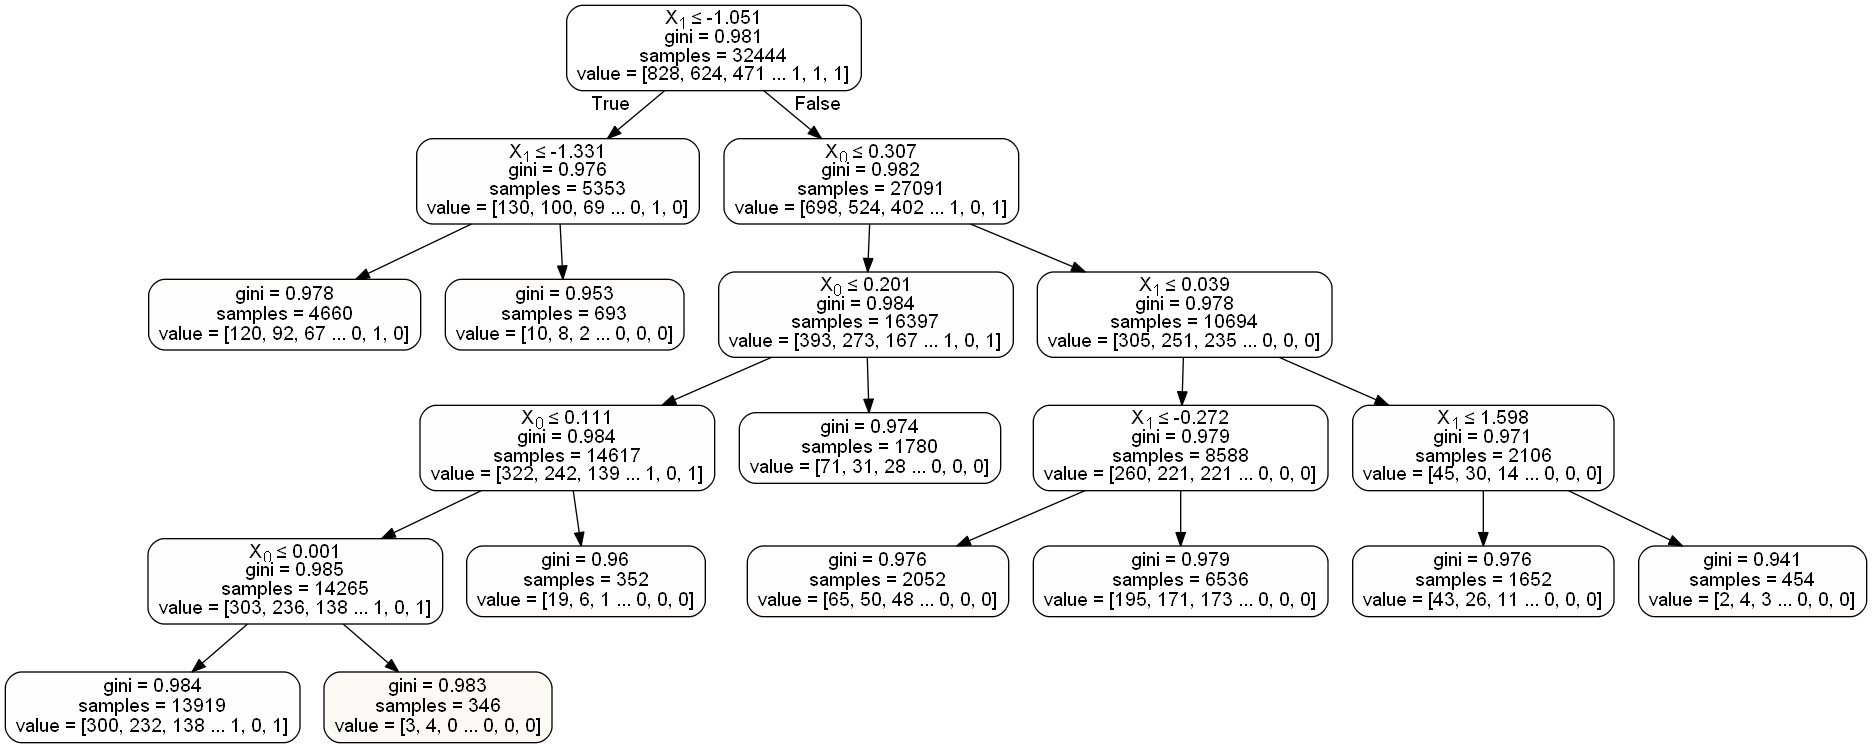

In [43]:
#Tree graph for 'Time'

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

dot_data = StringIO()
export_graphviz(classifier_tm, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [45]:
#Random Forest for 'Time'

forest_tm = RandomForestClassifier(n_estimators=100, random_state=0, criterion="gini")
forest_tm.fit(X_train,Y_train)

print('acc for training data: {:.3f}'.format(forest_eve.score(X_train,Y_train)))
print('acc for test data: {:.3f}'.format(forest_eve.score(X_test,Y_test)))

forpredict=forest_tm.predict(X_test)

confusion_matrix= sklearn.metrics.confusion_matrix(Y_test,forpredict)
print('The confusion matrix is =')
print(confusion_matrix)

print('Recall')
print(1- metrics.accuracy_score(Y_test,forpredict))


acc for training data: 0.026
acc for test data: 0.025
The confusion matrix is =
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Recall
0.9481276005547851


# Crime Intensity

In [46]:
data_int = crimes_pred_data.drop(['PD_DESC','LAW_CAT_CD','CRM_ATPT_CPTD_CD','Precinct','Time','BORO_NM'],axis=1)

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
data_int['OFNS_DESC'] = labelencoder_X.fit_transform(data_int['OFNS_DESC'])
data_int['PREM_TYP_DESC'] = labelencoder_X.fit_transform(data_int['PREM_TYP_DESC'])
data_int['LOC_OF_OCCUR_DESC'] = labelencoder_X.fit_transform(data_int['LOC_OF_OCCUR_DESC'])
data_int['Morning'] = labelencoder_X.fit_transform(data_int['Morning'])
data_int['Afternoon'] = labelencoder_X.fit_transform(data_int['Afternoon'])
data_int['Evening'] = labelencoder_X.fit_transform(data_int['Evening'])
data_int['Night'] = labelencoder_X.fit_transform(data_int['Night'])

data_ci = crimes_pred_data.copy()
data_ci.reset_index(drop=True, inplace=True)
data_ci= data_ci.drop(['PD_DESC','OFNS_DESC','PREM_TYP_DESC','LOC_OF_OCCUR_DESC','CRM_ATPT_CPTD_CD','Precinct','Time','Morning','Afternoon','Evening','Night'],axis=1)

data_int.head()

,OFNS_DESC,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,Morning,Afternoon,Evening,Night
StartTime,,,,,,,
2014-03-30 20:40:00,1,1,0,0,0,1,0
2015-12-31 19:45:00,0,1,2,0,0,1,0
2015-12-31 17:15:00,0,1,0,0,1,0,0
2015-12-31 10:30:00,0,1,0,1,0,0,0
2015-12-31 00:23:00,0,1,2,0,0,0,0


In [47]:
X_int = data_int.iloc[:, 0:6].values
data_ci['LAW_CAT_CD'] = labelencoder_X.fit_transform(data_ci['LAW_CAT_CD'])
Y_int = data_ci['LAW_CAT_CD']

In [48]:
#Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X_int, Y_int, test_size = 0.25, random_state = 0)

#Scaling the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#PCA
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

#Decision Tree for 'Crime intensity'

classifier_int= DecisionTreeClassifier(max_leaf_nodes=10,random_state=0)
classifier_int= classifier.fit(X_train,Y_train)
print(type(classifier))

predictions=classifier_int.predict(X_test)
predictions_train=classifier_int.predict(X_train)

confusion_matrix= sklearn.metrics.confusion_matrix(Y_test,predictions)
print('The confusion matrix is =')
print(confusion_matrix)

test_accuracy_score= sklearn.metrics.accuracy_score(Y_test,predictions)
print('The testing accuracy =')
print(test_accuracy_score)

train_accuracy_score= sklearn.metrics.accuracy_score(Y_train,predictions_train)
print('The training accuracy =')
print(train_accuracy_score)


[0.22786175 0.19607262]
<class 'sklearn.tree.tree.DecisionTreeClassifier'>
The confusion matrix is =
[[    0   812]
 [    0 10003]]
The testing accuracy =
0.9249190938511327
The training accuracy =
0.9229133275798299


C:\Users\Riidhima\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


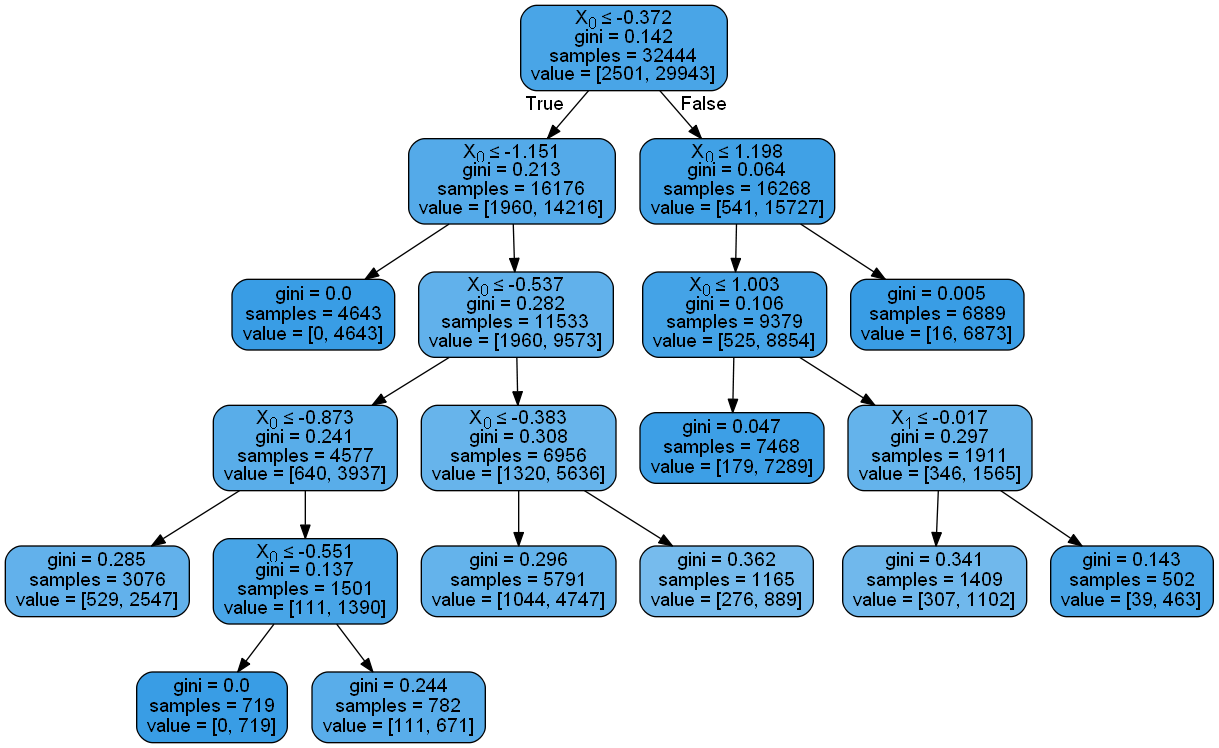

In [49]:
#Tree graph for 'Crime intensity'

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

dot_data = StringIO()
export_graphviz(classifier_int, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [50]:
#Random Forest for 'Crime intensity'

forest_int = RandomForestClassifier(n_estimators=100, random_state=0, criterion="gini")
forest_int.fit(X_train,Y_train)

print('acc for training data: {:.3f}'.format(forest_int.score(X_train,Y_train)))
print('acc for test data: {:.3f}'.format(forest_int.score(X_test,Y_test)))

forpredict=forest_int.predict(X_test)

confusion_matrix= sklearn.metrics.confusion_matrix(Y_test,forpredict)
print('The confusion matrix is =')
print(confusion_matrix)

print('Recall')
print(1- metrics.accuracy_score(Y_test,forpredict))
print('Precision')
print(metrics.precision_score(Y_test,forpredict))

TP=confusion_matrix[1,1]
TN=confusion_matrix[0,0]
FP=confusion_matrix[0,1]
FN=confusion_matrix[1,0]

sensitivity = TN/ float(TN + FP)
print('sensitivity')
print(sensitivity)

false_positive_rate= FP/ float (TN+FP)
print('Specificity')
print (false_positive_rate)

acc for training data: 0.923
acc for test data: 0.925
The confusion matrix is =
[[    0   812]
 [    0 10003]]
Recall
0.07508090614886731
Precision
0.9249190938511327
sensitivity
0.0
Specificity
1.0


# Premises

In [51]:
data_p = crimes_pred_data.drop(['PD_DESC','PREM_TYP_DESC','CRM_ATPT_CPTD_CD','Precinct','Time','BORO_NM'],axis=1)

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
data_p['OFNS_DESC'] = labelencoder_X.fit_transform(data_p['OFNS_DESC'])
data_p['LAW_CAT_CD'] = labelencoder_X.fit_transform(data_p['LAW_CAT_CD'])
data_p['LOC_OF_OCCUR_DESC'] = labelencoder_X.fit_transform(data_p['LOC_OF_OCCUR_DESC'])
data_p['Morning'] = labelencoder_X.fit_transform(data_p['Morning'])
data_p['Afternoon'] = labelencoder_X.fit_transform(data_p['Afternoon'])
data_p['Evening'] = labelencoder_X.fit_transform(data_p['Evening'])
data_p['Night'] = labelencoder_X.fit_transform(data_p['Night'])

data_prem = crimes_pred_data.copy()
data_prem.reset_index(drop=True, inplace=True)
data_prem = data_prem.drop(['PD_DESC','OFNS_DESC','LAW_CAT_CD','LOC_OF_OCCUR_DESC','CRM_ATPT_CPTD_CD','Precinct','Time','Morning','Afternoon','Evening','Night'],axis=1) 

data_p.head()

,OFNS_DESC,LAW_CAT_CD,LOC_OF_OCCUR_DESC,Morning,Afternoon,Evening,Night
StartTime,,,,,,,
2014-03-30 20:40:00,1,0,1,0,0,1,0
2015-12-31 19:45:00,0,1,1,0,0,1,0
2015-12-31 17:15:00,0,1,1,0,1,0,0
2015-12-31 10:30:00,0,1,1,1,0,0,0
2015-12-31 00:23:00,0,1,1,0,0,0,0


In [52]:
X_p = data_p.iloc[:, 0:6].values
data_prem['PREM_TYP_DESC'] = labelencoder_X.fit_transform(data_prem['PREM_TYP_DESC'])
Y_p = data_prem['PREM_TYP_DESC']

In [53]:
#Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X_p, Y_p, test_size = 0.25, random_state = 0)

#Scaling the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#PCA
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

#Decision Tree for 'Premises'

classifier_p= DecisionTreeClassifier(max_leaf_nodes=10,random_state=0)
classifier_p= classifier.fit(X_train,Y_train)
print(type(classifier))

predictions=classifier_p.predict(X_test)
predictions_train=classifier_p.predict(X_train)

confusion_matrix= sklearn.metrics.confusion_matrix(Y_test,predictions)
print('The confusion matrix is =')
print(confusion_matrix)

test_accuracy_score= sklearn.metrics.accuracy_score(Y_test,predictions)
print('The testing accuracy =')
print(test_accuracy_score)

train_accuracy_score= sklearn.metrics.accuracy_score(Y_train,predictions_train)
print('The training accuracy =')
print(train_accuracy_score)


[0.19638046 0.19279021]
<class 'sklearn.tree.tree.DecisionTreeClassifier'>
The confusion matrix is =
[[2039    0 1359]
 [ 102    0  460]
 [ 656    0 6199]]
The testing accuracy =
0.7617198335644938
The training accuracy =
0.7577055850080138


C:\Users\Riidhima\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


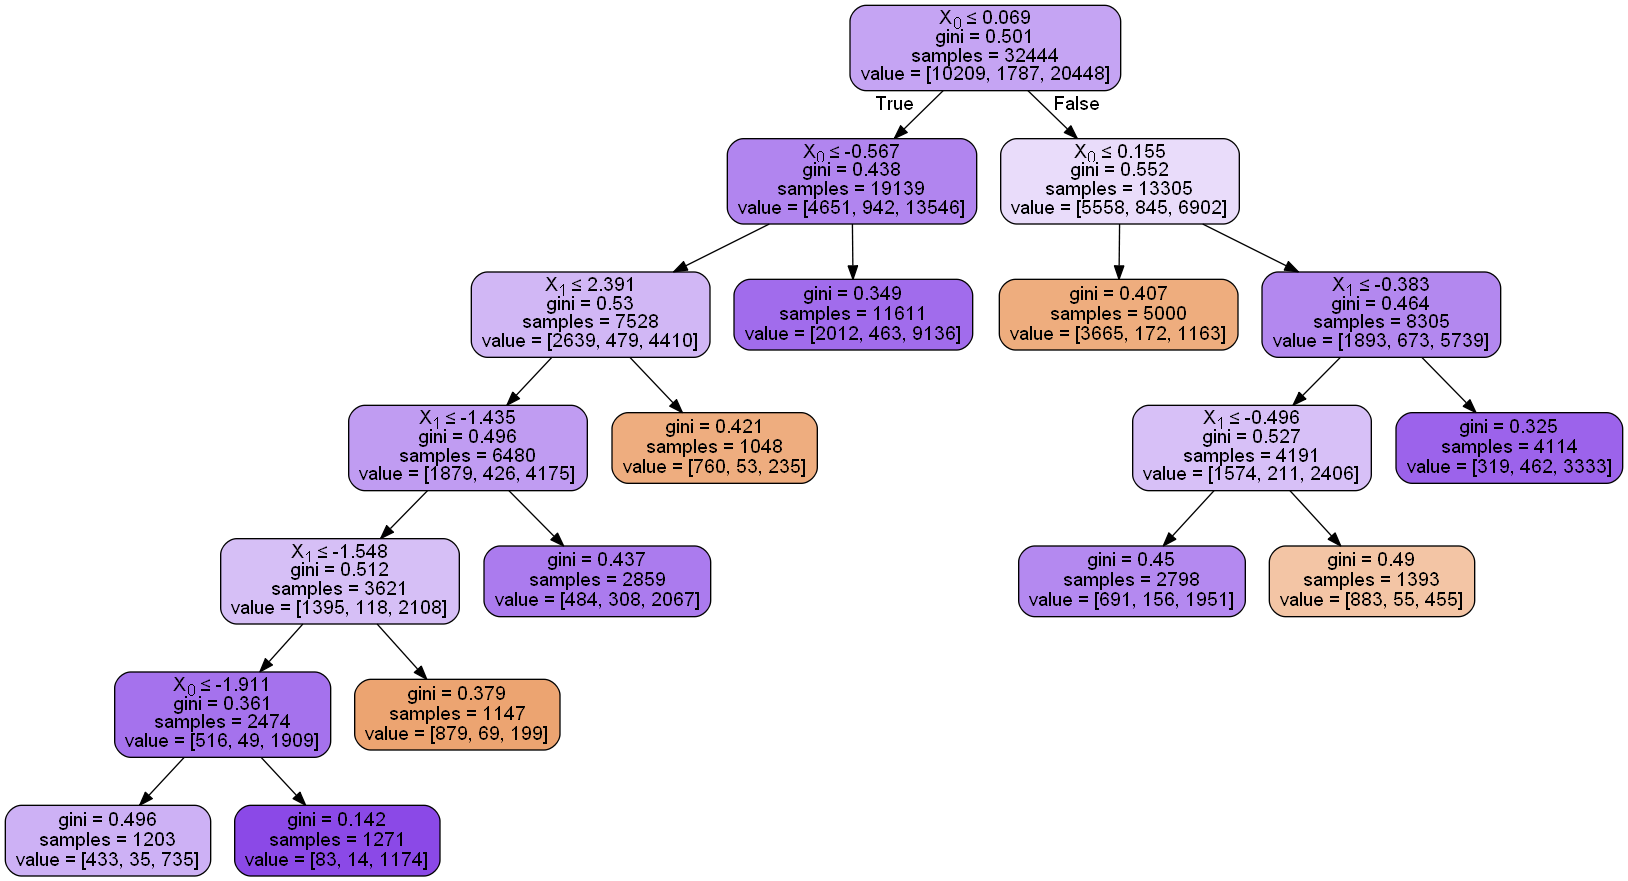

In [54]:
#Tree graph for 'Premises'

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

dot_data = StringIO()
export_graphviz(classifier_p, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [56]:
#Random Forest for 'Premises'

forest_p = RandomForestClassifier(n_estimators=100, random_state=0, criterion="gini")
forest_p.fit(X_train,Y_train)

print('acc for training data: {:.3f}'.format(forest_p.score(X_train,Y_train)))
print('acc for test data: {:.3f}'.format(forest_p.score(X_test,Y_test)))

forpredict=forest_eve.predict(X_test)

confusion_matrix= sklearn.metrics.confusion_matrix(Y_test,forpredict)
print('The confusion matrix is =')
print(confusion_matrix)

print('Recall')
print(1- metrics.accuracy_score(Y_test,forpredict))


acc for training data: 0.764
acc for test data: 0.771
The confusion matrix is =
[[3398    0    0]
 [ 562    0    0]
 [6855    0    0]]
Recall
0.6858067498844198


# Location

In [57]:
data_l = crimes_pred_data.drop(['PD_DESC','LOC_OF_OCCUR_DESC','CRM_ATPT_CPTD_CD','Precinct','Time','BORO_NM'],axis=1)

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
data_l['OFNS_DESC'] = labelencoder_X.fit_transform(data_l['OFNS_DESC'])
data_l['LAW_CAT_CD'] = labelencoder_X.fit_transform(data_l['LAW_CAT_CD'])
data_l['PREM_TYP_DESC'] = labelencoder_X.fit_transform(data_l['PREM_TYP_DESC'])
data_l['Morning'] = labelencoder_X.fit_transform(data_l['Morning'])
data_l['Afternoon'] = labelencoder_X.fit_transform(data_l['Afternoon'])
data_l['Evening'] = labelencoder_X.fit_transform(data_l['Evening'])
data_l['Night'] = labelencoder_X.fit_transform(data_l['Night'])

data_lc = crimes_pred_data.copy()
data_lc.reset_index(drop=True, inplace=True)
data_lc = data_lc.drop(['PD_DESC','OFNS_DESC','PREM_TYP_DESC','LAW_CAT_CD','LAW_CAT_CD','CRM_ATPT_CPTD_CD','Precinct','Time','Morning','Afternoon','Evening','Night'],axis=1)    

data_l.head()

,OFNS_DESC,LAW_CAT_CD,PREM_TYP_DESC,Morning,Afternoon,Evening,Night
StartTime,,,,,,,
2014-03-30 20:40:00,1,0,0,0,0,1,0
2015-12-31 19:45:00,0,1,2,0,0,1,0
2015-12-31 17:15:00,0,1,0,0,1,0,0
2015-12-31 10:30:00,0,1,0,1,0,0,0
2015-12-31 00:23:00,0,1,2,0,0,0,0


In [58]:
X_loc = data_l.iloc[:, 0:6].values
data_lc['LOC_OF_OCCUR_DESC'] = labelencoder_X.fit_transform(data_lc['LOC_OF_OCCUR_DESC'])
Y_loc = data_lc['LOC_OF_OCCUR_DESC']

In [59]:
#Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X_loc, Y_loc, test_size = 0.25, random_state = 0)

#Scaling the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#PCA
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

#Decision Tree for 'Location'

classifier_loc= DecisionTreeClassifier(max_leaf_nodes=10,random_state=0)
classifier_loc= classifier.fit(X_train,Y_train)
print(type(classifier))

predictions=classifier_loc.predict(X_test)
predictions_train=classifier_loc.predict(X_train)

confusion_matrix= sklearn.metrics.confusion_matrix(Y_test,predictions)
print('The confusion matrix is =')
print(confusion_matrix)

test_accuracy_score= sklearn.metrics.accuracy_score(Y_test,predictions)
print('The testing accuracy =')
print(test_accuracy_score)

train_accuracy_score= sklearn.metrics.accuracy_score(Y_train,predictions_train)
print('The training accuracy =')
print(train_accuracy_score)


[0.22636918 0.19550921]
<class 'sklearn.tree.tree.DecisionTreeClassifier'>
The confusion matrix is =
[[  67 2554    0    0]
 [  65 7572    0    0]
 [   7  385    0    0]
 [  25  140    0    0]]
The testing accuracy =
0.706333795654184
The training accuracy =
0.7040747133522377


C:\Users\Riidhima\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


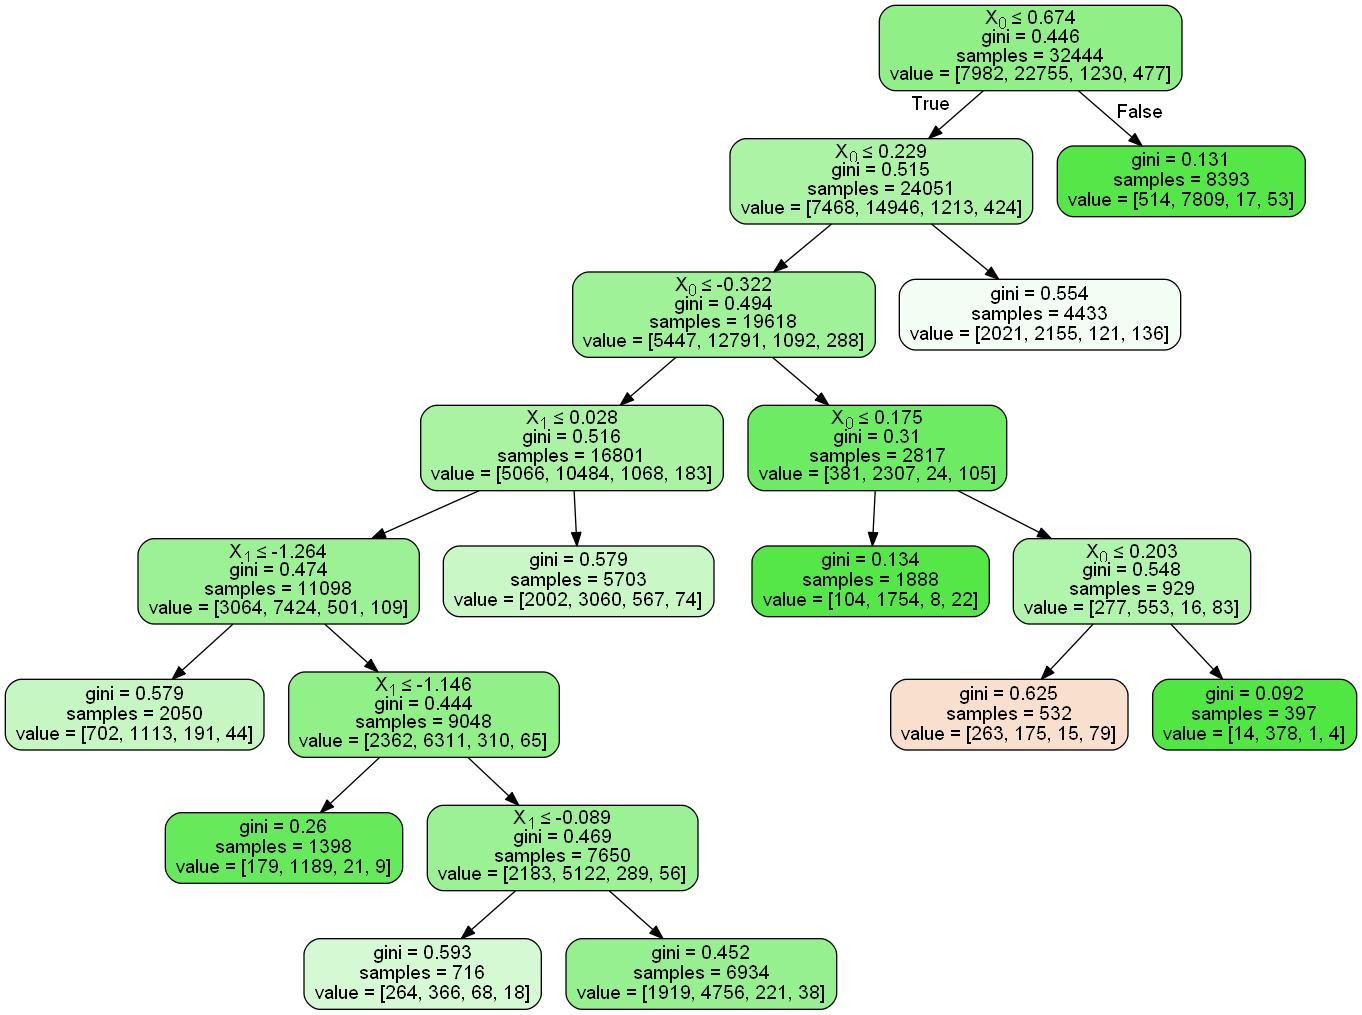

In [60]:
#Tree graph for 'Location'

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

dot_data = StringIO()
export_graphviz(classifier_loc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [62]:
#Random Forest for 'location'

forest_loc = RandomForestClassifier(n_estimators=100, random_state=0, criterion="gini")
forest_loc.fit(X_train,Y_train)

print('acc for training data: {:.3f}'.format(forest_loc.score(X_train,Y_train)))
print('acc for test data: {:.3f}'.format(forest_loc.score(X_test,Y_test)))

forpredict=forest_loc.predict(X_test)

confusion_matrix= sklearn.metrics.confusion_matrix(Y_test,forpredict)
print('The confusion matrix is =')
print(confusion_matrix)

print('Recall')
print(1- metrics.accuracy_score(Y_test,forpredict))


acc for training data: 0.711
acc for test data: 0.714
The confusion matrix is =
[[ 253 2368    0    0]
 [ 166 7471    0    0]
 [  24  368    0    0]
 [  81   84    0    0]]
Recall
0.2858067498844198


# Offense

In [63]:
data_of = crimes_pred_data.drop(['PD_DESC','OFNS_DESC','CRM_ATPT_CPTD_CD','Precinct','Time','BORO_NM'],axis=1)

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
data_of['LAW_CAT_CD'] = labelencoder_X.fit_transform(data_of['LAW_CAT_CD'])
data_of['PREM_TYP_DESC'] = labelencoder_X.fit_transform(data_of['PREM_TYP_DESC'])
data_of['LOC_OF_OCCUR_DESC'] = labelencoder_X.fit_transform(data_of['LOC_OF_OCCUR_DESC'])
data_of['Morning'] = labelencoder_X.fit_transform(data_of['Morning'])
data_of['Afternoon'] = labelencoder_X.fit_transform(data_of['Afternoon'])
data_of['Evening'] = labelencoder_X.fit_transform(data_of['Evening'])
data_of['Night'] = labelencoder_X.fit_transform(data_of['Night'])

data_off = crimes_pred_data.copy()
data_off.reset_index(drop=True, inplace=True)
data_off = data_off.drop(['PD_DESC','LAW_CAT_CD','PREM_TYP_DESC','LOC_OF_OCCUR_DESC','CRM_ATPT_CPTD_CD','Precinct','Time','Morning','Afternoon','Evening','Night'],axis=1)    

data_of.head()

,LAW_CAT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,Morning,Afternoon,Evening,Night
StartTime,,,,,,,
2014-03-30 20:40:00,0,1,0,0,0,1,0
2015-12-31 19:45:00,1,1,2,0,0,1,0
2015-12-31 17:15:00,1,1,0,0,1,0,0
2015-12-31 10:30:00,1,1,0,1,0,0,0
2015-12-31 00:23:00,1,1,2,0,0,0,0


In [65]:
X_ofns = data_of.iloc[:, 0:6].values
data_off['OFNS_DESC'] = labelencoder_X.fit_transform(data_off['OFNS_DESC'])
Y_ofns = data_off['OFNS_DESC']

In [66]:
#Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X_ofns, Y_ofns, test_size = 0.25, random_state = 0)

#Scaling the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#PCA
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

#Decision Tree for 'Offense'

classifier_ofns= DecisionTreeClassifier(max_leaf_nodes=10,random_state=0)
classifier_ofns= classifier.fit(X_train,Y_train)
print(type(classifier))

predictions=classifier_ofns.predict(X_test)
predictions_train=classifier_ofns.predict(X_train)

confusion_matrix= sklearn.metrics.confusion_matrix(Y_test,predictions)
print('The confusion matrix is =')
print(confusion_matrix)

test_accuracy_score= sklearn.metrics.accuracy_score(Y_test,predictions)
print('The testing accuracy =')
print(test_accuracy_score)

train_accuracy_score= sklearn.metrics.accuracy_score(Y_train,predictions_train)
print('The training accuracy =')
print(train_accuracy_score)

[0.20400311 0.1954302 ]
<class 'sklearn.tree.tree.DecisionTreeClassifier'>
The confusion matrix is =
[[2217 1292   18]
 [ 641 4092   65]
 [ 714 1676  100]]
The testing accuracy =
0.5926028663892742
The training accuracy =
0.5968437923807175


C:\Users\Riidhima\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


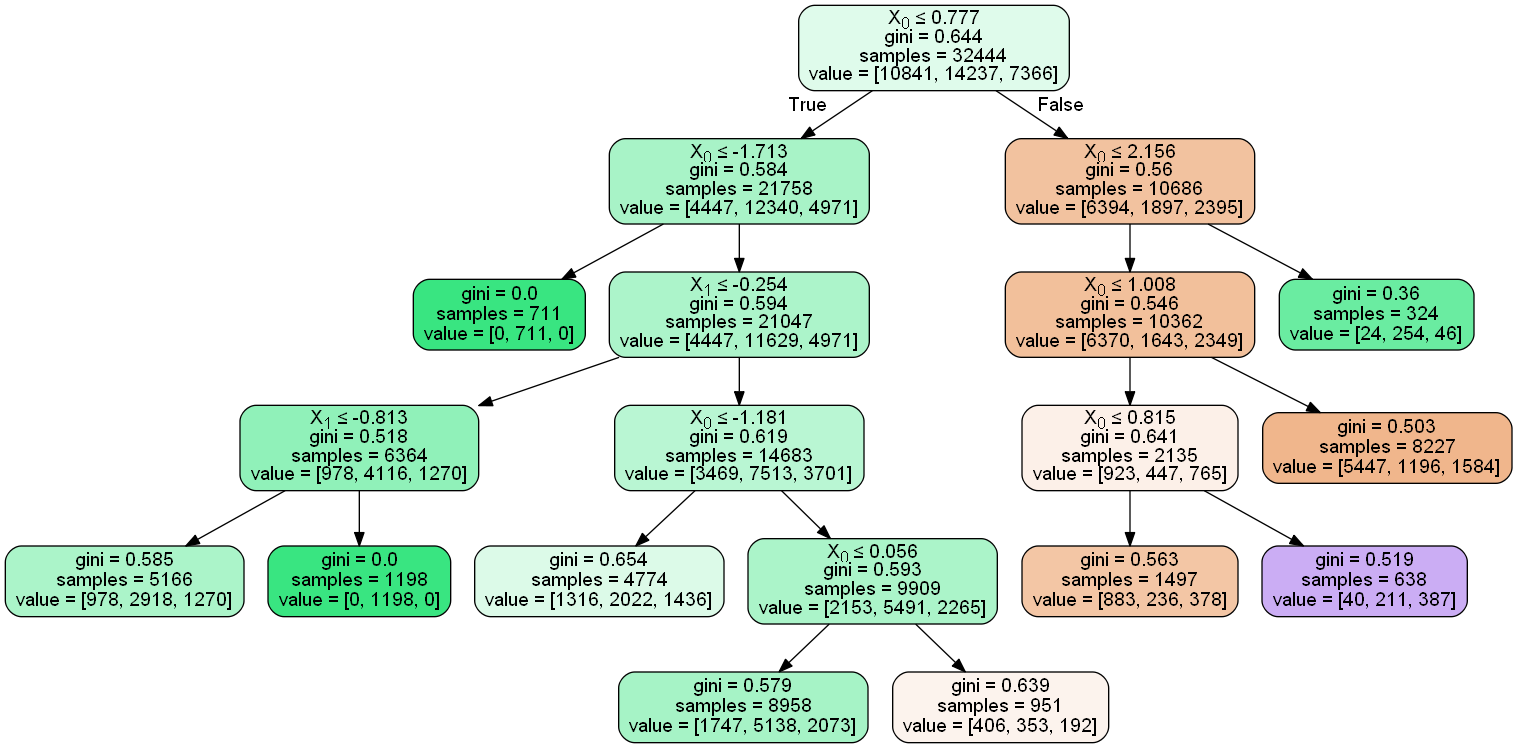

In [67]:
#Tree graph for 'Offense'

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

dot_data = StringIO()
export_graphviz(classifier_ofns, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [69]:
#Random Forest for 'Offense'

forest_ofns= RandomForestClassifier(n_estimators=100, random_state=0, criterion="gini")
forest_ofns.fit(X_train,Y_train)

print('acc for training data: {:.3f}'.format(forest_ofns.score(X_train,Y_train)))
print('acc for test data: {:.3f}'.format(forest_ofns.score(X_test,Y_test)))

forpredict=forest_ofns.predict(X_test)

confusion_matrix= sklearn.metrics.confusion_matrix(Y_test,forpredict)
print('The confusion matrix is =')
print(confusion_matrix)

print('Recall')
print(1- metrics.accuracy_score(Y_test,forpredict))


acc for training data: 0.612
acc for test data: 0.608
The confusion matrix is =
[[2231 1201   95]
 [ 565 4053  180]
 [ 661 1542  287]]
Recall
0.39241793804900604
